In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline

In [108]:
data = pd.read_csv("LBW_Dataset.csv")
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data.head()

,community,age,weight,delivery_phase,hb,ifa,bp,education,residence,result
0,1,21.0,42.0,1.0,9.2,1,1.375,5.0,1.0,0
1,1,21.0,NaN,1.0,8.8,1,1.500,5.0,1.0,0
2,1,21.0,NaN,1.0,9.2,1,2.125,5.0,1.0,0
3,1,21.0,NaN,1.0,8.0,1,1.375,5.0,1.0,0
4,1,24.0,33.0,1.0,9.3,1,1.571,5.0,1.0,0


In [109]:
nulls=data.isnull().sum()
nulls
#(nulls*100)/96

community          0
age                7
weight            11
delivery_phase     4
hb                19
ifa                0
bp                15
education          3
residence          2
result             0
dtype: int64

In [110]:
print("no of rows with label 1 : ", sum(data.result == 1))
print("no of rows with label 0 : ", sum(data.result == 0))

no of rows with label 1 :  72
no of rows with label 0 :  24


count    89.000000
mean     23.752809
std       3.321011
min      17.000000
25%      21.000000
50%      24.000000
75%      26.000000
max      38.000000
Name: age, dtype: float64

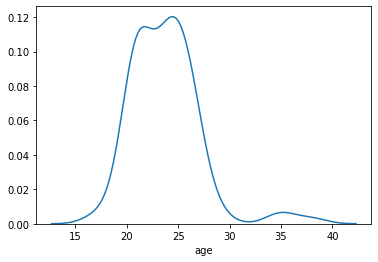

In [111]:
age = data[np.isfinite(data['age'])]
sns.distplot(age['age'], hist = False, kde = True)
data['age'].describe()

count    85.000000
mean     45.129412
std       8.215532
min      30.000000
25%      40.000000
50%      43.000000
75%      50.000000
max      65.000000
Name: weight, dtype: float64

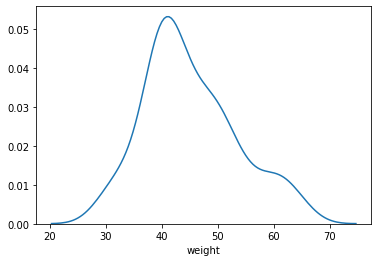

In [112]:
weight = data[np.isfinite(data['weight'])]
sns.distplot(weight['weight'], hist = False, kde = True)
data['weight'].describe()

count    81.000000
mean      1.725189
std       1.449447
min       1.200000
25%       1.375000
50%       1.500000
75%       1.661538
max      13.875000
Name: bp, dtype: float64

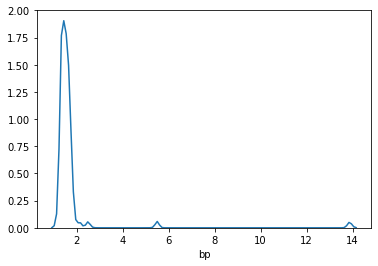

In [113]:
bp = data[np.isfinite(data['bp'])]
sns.distplot(bp['bp'], hist = False, kde = True)
data['bp'].describe()

In [114]:
print(data.shape)

(96, 10)


In [115]:
data1 = data[data['result'] == 1]
data2 = data[data['result'] == 0]

In [116]:
data1.is_copy = 0
data2.is_copy = 0
data1['weight'].fillna((data1['weight'].mean()), inplace=True)
data1['age'].fillna((data1['age'].mean()), inplace=True)
data1['hb'].fillna((data1['hb'].mean()), inplace=True)
data1['bp'].fillna((data1['bp'].median()), inplace=True)
data2['weight'].fillna((data2['weight'].mean()), inplace=True)
data2['age'].fillna((data2['age'].mean()), inplace=True)
data2['hb'].fillna((data2['hb'].mean()), inplace=True)
data2['bp'].fillna((data2['bp'].median()), inplace=True)

In [117]:
data1.head()

,community,age,weight,delivery_phase,hb,ifa,bp,education,residence,result
24,1,24.000000,49.0,1.0,8.9,1,1.333333,5.0,1.0,1
25,1,23.731343,40.0,1.0,8.7,1,1.714286,5.0,1.0,1
26,1,24.000000,40.0,1.0,9.5,1,1.714286,5.0,1.0,1
27,1,26.000000,45.0,1.0,9.0,1,1.375000,5.0,1.0,1
28,1,24.000000,48.0,1.0,9.6,1,1.571429,5.0,1.0,1


In [118]:
data1 = data1.fillna(data1['delivery_phase'].value_counts().index[0])
data1 = data1.fillna(data1['education'].value_counts().index[0])
data1 = data1.fillna(data1['residence'].value_counts().index[0])
data1 = data1.fillna(data1['ifa'].value_counts().index[0])
data2 = data2.fillna(data2['delivery_phase'].value_counts().index[0])
data2 = data2.fillna(data2['education'].value_counts().index[0])
data2 = data2.fillna(data2['residence'].value_counts().index[0])
data2 = data2.fillna(data2['ifa'].value_counts().index[0])

In [119]:
one_hot=pd.get_dummies(data1['community'])
data1=data1.drop('community',axis=1)
data1=data1.join(one_hot)
data1=data1.reindex(columns=[1,4,'age','weight','hb','delivery_phase','education','ifa','bp','residence','result'])
data1.head(10)

,1,4,age,weight,hb,delivery_phase,education,ifa,bp,residence,result
24,1,0,24.000000,49.0,8.900000,1.0,5.0,1,1.333333,1.0,1
25,1,0,23.731343,40.0,8.700000,1.0,5.0,1,1.714286,1.0,1
26,1,0,24.000000,40.0,9.500000,1.0,5.0,1,1.714286,1.0,1
27,1,0,26.000000,45.0,9.000000,1.0,5.0,1,1.375000,1.0,1
28,1,0,24.000000,48.0,9.600000,1.0,5.0,1,1.571429,1.0,1
29,1,0,28.000000,60.0,9.000000,1.0,5.0,1,1.375000,1.0,1
30,0,1,21.000000,37.0,9.072131,1.0,5.0,1,1.375000,1.0,1
31,1,0,24.000000,48.0,9.000000,1.0,5.0,1,1.375000,1.0,1
32,0,1,22.000000,50.0,9.200000,1.0,5.0,1,1.571000,1.0,1
33,1,0,22.000000,35.0,8.900000,1.0,5.0,1,1.500000,1.0,1


In [120]:
one_hot=pd.get_dummies(data2['community'])
data2=data2.drop('community',axis=1)
data2=data2.join(one_hot)
data2=data2.reindex(columns=[1,4,'age','weight','hb','delivery_phase','education','ifa','bp','residence','result'])
data2.head(10)

,1,4,age,weight,hb,delivery_phase,education,ifa,bp,residence,result
0,1,0,21.0,42.0,9.20000,1.0,5.0,1,1.375000,1.0,0
1,1,0,21.0,36.0,8.80000,1.0,5.0,1,1.500000,1.0,0
2,1,0,21.0,36.0,9.20000,1.0,5.0,1,2.125000,1.0,0
3,1,0,21.0,36.0,8.00000,1.0,5.0,1,1.375000,1.0,0
4,1,0,24.0,33.0,9.30000,1.0,5.0,1,1.571000,1.0,0
5,1,0,26.0,35.0,9.20000,1.0,5.0,1,1.571429,1.0,0
6,0,1,26.0,31.0,9.09375,1.0,5.0,1,1.625000,1.0,0
7,1,0,22.0,30.0,9.09375,1.0,1.0,1,1.571429,1.0,0
8,0,1,17.0,30.0,9.00000,1.0,5.0,0,1.375000,1.0,0
9,0,0,35.0,36.0,9.90000,1.0,5.0,1,1.571429,1.0,0


In [121]:
frames = [data2, data1]
data = pd.concat(frames)

In [123]:
data.isnull().values.any()

False

In [124]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,1,4,age,weight,hb,delivery_phase,education,ifa,bp,residence,result
1,1.000000,-0.437992,-0.096009,-0.174776,-0.153958,0.003040,0.056139,0.120820,0.090780,-0.083102,-0.060154
4,-0.437992,1.000000,-0.141078,0.087311,0.108387,-0.065233,0.080322,0.000000,-0.074924,0.149760,0.000000
age,-0.096009,-0.141078,1.000000,0.071521,0.054562,0.034266,0.032190,-0.017109,-0.061697,-0.055433,-0.011826
weight,-0.174776,0.087311,0.071521,1.000000,-0.028873,-0.036984,0.089256,0.168208,0.067100,0.325735,0.567980
hb,-0.153958,0.108387,0.054562,-0.028873,1.000000,-0.068785,0.005697,-0.037106,-0.063768,-0.122183,-0.013350
delivery_phase,0.003040,-0.065233,0.034266,-0.036984,-0.068785,1.000000,0.026198,-0.216353,-0.017558,-0.057728,-0.084215
education,0.056139,0.080322,0.032190,0.089256,0.005697,0.026198,1.000000,0.008073,0.025653,0.071081,0.172825
ifa,0.120820,0.000000,-0.017109,0.168208,-0.037106,-0.216353,0.008073,1.000000,0.026773,0.135463,0.181650
bp,0.090780,-0.074924,-0.061697,0.067100,-0.063768,-0.017558,0.025653,0.026773,1.000000,0.248201,-0.009031
residence,-0.083102,0.149760,-0.055433,0.325735,-0.122183,-0.057728,0.071081,0.135463,0.248201,1.000000,0.087882


In [94]:
# data.to_csv("cleaned_data_PES2201800211.csv")
# data.head()

In [125]:
nulls=data.isnull().sum()
nulls
#(nulls*100)/96

1                 0
4                 0
age               0
weight            0
hb                0
delivery_phase    0
education         0
ifa               0
bp                0
residence         0
result            0
dtype: int64

In [126]:
def sigmoid(Z):
  return 1/(np.exp(-Z)+1)
def relu(Z):
  return np.maximum(0,Z)

In [127]:
def init_parameters(dims):
  parameters={}
  for l in range(1,len(dims)):
    parameters["W"+ str(l)]=np.random.randn(dims[l],dims[l-1])*np.sqrt(2/dims[l-1])
    parameters["b"+ str(l)]=np.zeros(shape=(dims[l],1))
    #limit=np.sqrt(6/(dims[l]+dims[l-1]))
    # parameters["W"+ str(l)]=np.random.uniform(-limit,limit,size=(dims[l],dims[l-1]))
    # parameters["b"+ str(l)]=np.random.uniform(-limit,limit,size=(dims[l],1))
  return parameters

def forward_activation(A,W,b,activation):
  Z=W.dot(A)+b
  if activation=="relu":
    A_new=relu(Z)
  elif activation=="sigmoid":
    A_new=sigmoid(Z)
  cache=((A,W,b),Z)
  return A_new,cache

def forward_propogate(X,parameters):
  L=len(parameters)//2
  caches=[]
  A=X
  for l in range(1,L):
    A_prev=A
    A,cache=forward_activation(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],"sigmoid")
    caches.append(cache)
  #Last layer
  O,cache=forward_activation(A,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
  caches.append(cache)
  return O,caches

In [128]:
def compute_cost(O,Y,parameters,lambd):
  assert(O.shape == Y.shape)
  m=Y.shape[1]
  #print("examples:",m)
  cost=(1./m)*(-np.dot(Y,np.log(O).T)-np.dot(1-Y,np.log(1-O).T))
  cost=np.squeeze(cost)
  assert(cost.shape==())
  L=len(parameters)//2
  reg_cost=0
  for l in range(1,L+1):
    reg_cost+=(1/m) * (lambd/2) * np.sum(parameters["W"+str(l)]**2)
  return cost   #+reg_cost

In [129]:
#Back Propogation
def relu_diff(da,z):
  dz=da.copy()
  dz[z<=0]=0
  return dz
def sigmoid_diff(da,z):
  a=sigmoid(z)
  dz=da*a*(1-a)
  return dz

def backward_activation(da,cache,activation):
  cache1,cache2=cache
  lambd=0.7
  if activation=="relu":
    dz=relu_diff(da,cache2)
  elif activation=="sigmoid":
    dz=sigmoid_diff(da,cache2)
  a_prev,W,b=cache1
  m=a_prev.shape[1]
  da_prev=np.dot(W.T,dz)
  dW=np.dot(dz,a_prev.T)*(1./m)#+(lambd/m) * W
  db=np.sum(dz,axis=1,keepdims=True)*(1./m)
  return da_prev,dW,db

def back_propogate(O,Y,caches):
  grads={}
  m=O.shape[1]
  L=len(caches)
  Y=Y.reshape(O.shape)

  dO=-(np.divide(Y,O)-np.divide(1-Y,1-O))
  current_cache=caches[L-1]
  grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)]=backward_activation(dO,current_cache,"sigmoid")

  for l in reversed(range(L-1)):
    current_cache=caches[l]
    grads["dA"+str(l)],grads["dW"+str(l+1)],grads["db"+str(l+1)]=backward_activation(grads["dA"+str(l+1)],current_cache,"sigmoid")

  return grads

In [130]:
def update_parameters(parameters,v,grads,learning_rate):
    L = len(parameters) // 2 # number of layers in the neural networks
    beta=0.9
    # Momentum update for each parameter
    for l in range(L):
        
        ### START CODE HERE ### (approx. 4 lines)
        # compute velocities
        v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1-beta) * grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1-beta) * grads['db' + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v['dW' + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v['db' + str(l+1)]
        ### END CODE HERE ###
        
    return parameters, v

In [131]:
def predict(X,Y,parameters):
  #print(X[:,[0,5,10]])
  m=X.shape[1]
  n=len(parameters)//2
  predictions=np.zeros((1,m))
  prob,cache=forward_propogate(X,parameters)
  for i in range(0,prob.shape[1]):
    if prob[0][i] > 0.5:
        predictions[0][i]=1
    else:
        predictions[0][i]=0
  #print("Accuracy: "+str(np.sum(predictions[0]==Y[0])))
  print("Accuracy: "  + str(np.sum((predictions == Y)/m)))
  return predictions

In [132]:
def initialize_velocity(parameters):
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros_like(parameters['W' + str(l+1)])
        v["db" + str(l+1)] = np.zeros_like(parameters['b' + str(l+1)])
        ### END CODE HERE ###
        
    return v

In [133]:
def model(X,Y,layer_dims,learning_rate=0.0075,num_iterations=1500,print_cost=False):
  parameters=init_parameters(layers_dims)
  v=initialize_velocity(parameters)
  costs=[]
  for i in range(num_iterations):
    O,caches=forward_propogate(X,parameters)
    cost=compute_cost(O,Y,parameters,0.7)
    grads=back_propogate(O,Y,caches)
    parameters,v=update_parameters(parameters,v,grads,learning_rate)
    #print(O,len(O[0]))
    if print_cost and i%5000==0:
      print("Cost after",i,"iteration:",cost)
      costs.append(cost)
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations per 100')
  plt.title("learning rate="+str(learning_rate))
  plt.show()

  return parameters

In [134]:
df=data.to_numpy()
X_temp=df[:,[4,5,6]]
#print(X_temp[:5,:],np.sum(X_temp,axis=0))
mean=np.sum(X_temp,axis=0)/X_temp.shape[0]
X_temp-=mean
#print(X_temp[:5,:])
X_sigma=np.sum(X_temp**2,axis=0)/X_temp.shape[0]
df[:,[4,5,6]]=X_temp/np.sqrt(X_sigma)
np.savetxt("cleaned.csv",data,delimiter=',')
X=df[:,:-1]
Y=df[:,-1]
print(np.sum(Y==0),np.sum(Y==1))
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=11)
print(X_train.T.shape,X_test.T.shape,Y_train.T.shape,Y_test.T.shape,X_train.T[:,50],Y_train.reshape((1,len(Y_train)))[0,50])

24 72
(10, 67) (10, 29) (67,) (29,) [ 1.00000000e+00  0.00000000e+00  2.37313433e+01  4.00000000e+01
  3.20370495e-02 -1.45864991e-01  1.79605302e-01  0.00000000e+00
  1.57100000e+00  1.00000000e+00] 1.0


Cost after 0 iteration: 0.590328085143131
Cost after 5000 iteration: 0.41508860471335063
Cost after 10000 iteration: 0.4123987366529682
Cost after 15000 iteration: 0.4112652489083366
Cost after 20000 iteration: 0.4106421673214976
Cost after 25000 iteration: 0.4102747245932221
Cost after 30000 iteration: 0.4100442942461283
Cost after 35000 iteration: 0.4098898342977555
Cost after 40000 iteration: 0.4097792674949056
Cost after 45000 iteration: 0.40969467962127787
Cost after 50000 iteration: 0.40962474051202263
Cost after 55000 iteration: 0.4095602150086594
Cost after 60000 iteration: 0.4094884452104895
Cost after 65000 iteration: 0.40936334539818336
Cost after 70000 iteration: 0.4076995074923109
Cost after 75000 iteration: 0.3024722507620477


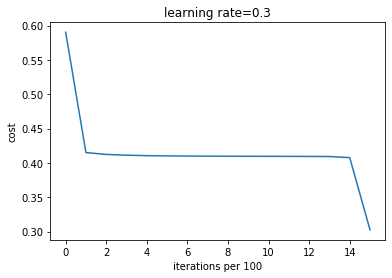

In [135]:
layers_dims=(10,10,3,1)
parameters=model(X_train.T,Y_train.reshape((1,len(Y_train))),layers_dims,learning_rate=0.3,num_iterations=80000,print_cost=True)

In [136]:
predict(X_train.T,Y_train.reshape((1,len(Y_train))),parameters)

Accuracy: 0.8656716417910448


array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]])

In [137]:
predict(X_test.T,Y_test.reshape((1,len(Y_test))),parameters)

Accuracy: 0.689655172413793


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.]])

In [138]:
parameters

{'W1': array([[ 2.37584210e-01, -4.61142829e-02, -5.33462475e-01,
          1.11156255e+00,  1.03264070e+00,  2.46429404e-01,
          7.61842593e-01,  1.57366795e-01, -4.98784212e-01,
         -5.63421519e-01],
        [ 3.47712086e-01,  9.61056217e-01, -2.68078917e-02,
         -3.82656929e-01,  1.94617685e-01,  1.33457917e-02,
          4.27454849e-01, -1.42036568e-01,  1.20164911e-01,
          4.82722061e-01],
        [ 4.34151688e-01, -9.44297950e-01,  2.00726789e-01,
          1.83326836e+00,  8.86098629e-01,  2.84615006e-01,
          6.35133753e-01,  6.90938588e-01, -3.16305264e-01,
         -2.08308561e+00],
        [-3.84233219e+00,  2.20811963e+00, -4.70014582e+00,
          2.61818744e+00, -9.12333144e+00,  2.29482534e-01,
         -2.11645280e+00, -3.79400574e+00,  3.24899449e-01,
         -2.60465439e-01],
        [-3.32162582e-02, -1.65646940e-01, -4.87261853e-01,
         -3.03396064e-01, -5.05201016e-01,  4.74717581e-01,
          9.37782913e-01,  5.09273166e-01,  4.